# BL40A2020 Wireless Communication Systems

## Assignment  week 6: Channel coding and information theory

## Author:

### 1. Follow similar steps done in the [notes](https://github.com/pedrohjn/wireless-comm/blob/master/Week%206/week6.ipynb) to analyze the *[Binary erasure channel](https://komm.readthedocs.io/en/latest/komm.BinaryErasureChannel/)* 

![](https://upload.wikimedia.org/wikipedia/commons/b/b6/Binary_erasure_channel.svg)

**(a) Find the analytical error probability for a repetition code with size $n$ as a function of  $p$ considering that 0 and 1 are equally distributed?**

Hint: Remember that the only way to get an error in this scenario is to have all $n$ bits in the coded block wrong.

According Binary Erasure channel, propability theory states that the relations are

- Pr[transmit 0] = $1-p$
- Pr[receive e | transmit 1] = $p$
- Pr[receive e | transmit p] = $p$
- Pr[receive 1 | transmit e] = $1-p$
- Pr[receive e] = $p$

So with repetitions, All n repetition are wrong in the error event. So analytical error for a repetition code is P = $p^n$

**(b) Verify your results with simulation for a repetition code of $n=6$ and $p=0.4$.** 

Hint: You need to program/adapt the decoding. The komm decoding for repetition code is based on the Majority rule, which is not suitable for BEC.

In [4]:
import math
import komm
import sympy as sp

sp.init_printing() 
import sk_dsp_comm.sigsys as ss
import scipy.special
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('bmh')
import warnings
warnings.filterwarnings('ignore')

input_seq_size = 10000 
code_length = 6 
tp = np.arange(0, input_seq_size, 1)
p_aux = 0.5

input_seq = np.random.choice([0, 1], size=input_seq_size, p = [p_aux, 1-p_aux])
p = 0.4
bec = komm.BinaryErasureChannel(p)
output_seq = bec(input_seq)
output_seq_coded = np.zeros(input_seq_size)

rep_code = komm.RepetitionCode(code_length)

for i in range(input_seq_size):
    coded_input = rep_code.encode(input_seq[i])
    coded_bec = bec(coded_input)
    if coded_bec.sum() == 2 * code_length:
        output_seq_coded[i] = 2
    else:
        output_seq_coded[i] = input_seq[i]
        
num_err_bec = (output_seq_coded == 2).sum()
print("Simulation:", num_err_bec/input_seq_size, "Analytical:",  p**code_length)

Simulation: 0.0032 Analytical: 0.0040960000000000015


**(c) Compute the capacity of this channel.**

Hint: $I(X;Y) = H(X) - H(X|Y) = H (X) - \sum\limits_{y={\{0,1,e\}}} p(y) H(X \; | \; Y=y)$

Text(0.02, 0.075, 'Achievable rates')

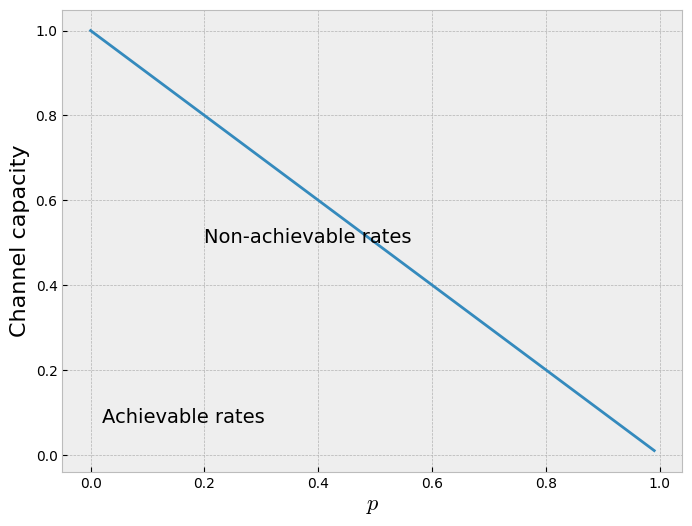

In [10]:
error_prob = np.arange(0, 1, 0.01)
capacity_bsc = 1 - error_prob

for i in range(len(error_prob)):
    capacity_bsc[i] = komm.BinaryErasureChannel(error_prob[i]).capacity()
    
plt.rcParams['figure.figsize'] = 8, 6
plt.plot(error_prob, capacity_bsc)
plt.xlabel('$p$', fontsize=16);
plt.ylabel('Channel capacity', fontsize=16);
plt.text(0.2,0.5,'Non-achievable rates',fontsize=14)
plt.text(0.02,0.075,'Achievable rates',fontsize=14)

**(d) Discuss how good is the repetition code in relation to the capacity based on a similar plot as the one presented in the tutorial.**

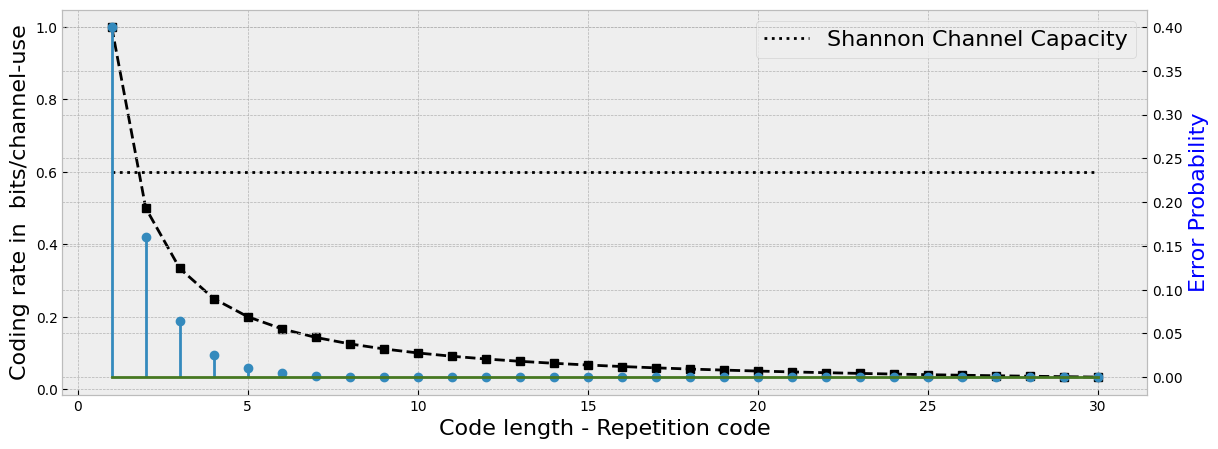

In [15]:
coded_length_plot = np.arange(1, 31, 1)
fig, ax1 = plt.subplots(figsize=(14, 5))
ax2 = ax1.twinx()

ax1.plot(coded_length_plot, 1/coded_length_plot, 'ks--')
ax1.plot([1,30],[komm.BinaryErasureChannel(p).capacity(),komm.BinaryErasureChannel(p).capacity()] ,"k:",label='Shannon Channel Capacity')
ax2.stem(coded_length_plot, p**coded_length_plot)
ax1.set_xlabel('Code length - Repetition code',fontsize=16)
ax1.set_ylabel('Coding rate in  bits/channel-use', color='k',fontsize=16)
ax2.set_ylabel('Error Probability', color='b',fontsize=16)
ax1.legend(fontsize=16)
plt.show() 

As we can see from the figure, the error probability is lower than the BSC (Binary Symmetric Channel). So with BEC the repetition code is utilizing the channel more efficient way than BSC. 

**2. Evaluate the performance of the $M$-PSK in relation to Shannon capacity considering the symbol error probability: $$P \approx 2 Q \left(\sqrt{\dfrac{2 E_b \log_2 M}{N_0}} \sin\left(  \dfrac{\pi}{M} \right)  \right).$$**

**Consider the cases of $M=4,8,16$ and plot the figure $P$ versus $E_b/N_0$ in db. Additionally, plot the Shannon capacity vs. $E_b/N_0$.**

**Analyze with your own words the results.**